In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
health_df=pd.read_csv("healthcare_dataset.csv")
health_df.head()

,blood_pressure,heart_rate
0,114.604290,70.318174
1,120.398556,83.234744
2,106.018224,81.901207
3,118.059278,77.404945
4,116.331618,89.079822


[]

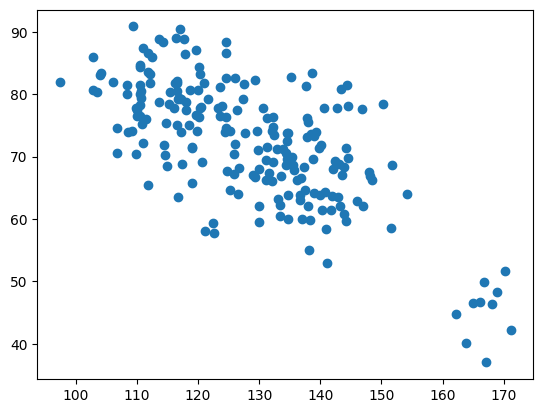

In [5]:
# visualize the outliers
plt.scatter(health_df.iloc[:,0],health_df.iloc[:,1])
plt.plot()

In [6]:
# now apply Isolation forest
from sklearn.ensemble import IsolationForest

isolation_forest=IsolationForest(contamination=0.2)
isolation_forest.fit(health_df)
predictions=isolation_forest.predict(health_df)

In [7]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [9]:
# now take index of the anomaly points
anomaly_index=np.where(predictions<0)
anomaly_index

(array([  4,  13,  21,  27,  32,  37,  56,  66,  72,  74,  81,  83,  84,
         85,  92,  93,  95,  96, 107, 108, 111, 117, 120, 123, 136, 143,
        161, 162, 169, 176, 179, 193, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209]),)

In [15]:
X=health_df.values
X

array([[114.60429032,  70.31817361],
       [120.39855594,  83.23474397],
       [106.01822383,  81.90120707],
       [118.05927797,  77.40494482],
       [116.33161767,  89.07982198],
       [118.93961011,  71.5794914 ],
       [117.31334915,  68.84684897],
       [134.64240112,  73.84855158],
       [109.89808013,  77.7264839 ],
       [110.75202436,  79.4600367 ],
       [110.01487579,  76.55258365],
       [110.55618305,  80.11233238],
       [109.90090298,  70.49076345],
       [124.51213225,  86.66258762],
       [126.36403398,  77.50709293],
       [110.43402965,  84.70377499],
       [108.34115542,  80.05635208],
       [118.77132445,  80.74051931],
       [110.58221565,  81.41860368],
       [120.06345454,  80.68625136],
       [116.62338417,  81.85633656],
       [102.87404708,  85.97491518],
       [127.38004161,  79.17912702],
       [129.36702138,  82.25402255],
       [110.09769048,  77.46158583],
       [111.89838752,  86.64070329],
       [117.28692313,  73.94164619],
 

In [ ]:
X[anomaly_index] # these are the anomalies

array([[116.33161767,  89.07982198],
       [124.51213225,  86.66258762],
       [102.87404708,  85.97491518],
       [117.67565432,  88.8056426 ],
       [103.96544618,  83.04386129],
       [116.79030361,  63.45672404],
       [113.66305536,  88.78611916],
       [104.12115087,  83.37115932],
       [116.99506947,  90.45156524],
       [114.23763574,  88.41578282],
       [106.7878776 ,  74.55779998],
       [109.39903348,  90.85362215],
       [124.56037303,  88.36525902],
       [102.81450476,  80.61794202],
       [103.4158888 ,  80.39533874],
       [ 97.40955235,  81.88317564],
       [110.98356621,  87.44392058],
       [106.83013746,  70.64540602],
       [122.38886274,  59.3596947 ],
       [146.8123228 ,  77.56703038],
       [138.16642827,  55.07965932],
       [144.38183215,  81.51461483],
       [141.17358969,  53.00356571],
       [121.08228977,  58.12760752],
       [122.54734481,  57.84225911],
       [151.61398387,  58.57699638],
       [111.82995697,  65.42356675],
 

[]

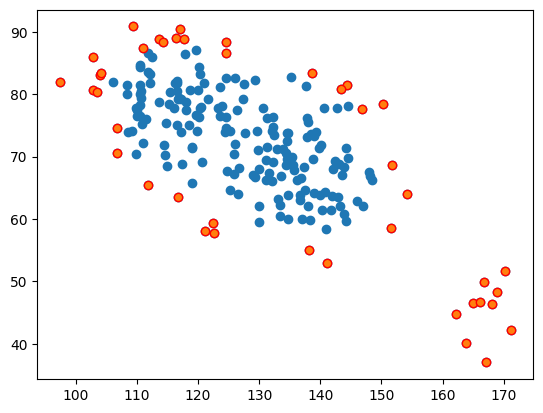

In [22]:
plt.scatter(health_df.iloc[:,0],health_df.iloc[:,1])
plt.scatter(X[anomaly_index,0],X[anomaly_index,1],edgecolors="r")
plt.plot()